# 노이즈 제거에 칼만필터 사용하기
평균값이 10이며 표준편차가 2인 노이즈가 섞여있는 데이터에 칼만필터를 적용해 보자
$x_P = A*x$
$P_p = A*P*A' + Q$
$K=P_p*H'*inv(H*P_p*H'+R)$
$x = x_p+K*(z-H*x_p)$
$P = P_p - K*H*P_p$


In [27]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2023)

In [28]:
data = np.random.normal(10, 2, 100)
data

array([11.42334706,  9.35103009,  7.99625872, 10.47250159,  9.79568032,
        7.71741475, 15.30881452, 12.88121039, 10.19780454,  3.75693569,
        7.84695671,  9.34863608,  7.92900425,  9.14735924,  7.94127721,
        8.95645159,  9.15448486,  9.80151165,  7.23948397, 10.60380563,
        7.93280135,  6.99564495,  7.2408132 ,  9.59109037, 11.28424989,
        9.63764894, 11.54349832, 11.48304697, 12.64952547, 10.87857342,
        8.88425301, 11.85415915,  8.79854682,  6.96050313, 14.19465838,
       11.78512391, 13.1929754 ,  8.72247588,  7.7339055 , 11.31319389,
       11.19157348,  8.37776071,  9.39893066, 12.0167824 ,  7.8244753 ,
        6.42584106, 10.68123758,  7.4929973 , 10.74157589, 10.91050752,
        5.43255977,  9.99835599, 14.79775197,  4.83379028, 12.62201769,
        6.84104498,  8.31863478,  9.6689812 ,  5.86317924, 10.90547748,
       10.10226325,  9.5238785 ,  9.58398204, 10.80260822, 10.36633813,
       12.47166053,  9.41639979, 10.05998491,  8.26319185, 11.20

In [29]:
# 시스템 모델 파라미터 초기화
A = 1
H = 1
Q = 0
R = 4
x0 = 10 # 초기값 세팅
P0 = 8

x_lst = [x0]
K_lst = [1]
P_lst = [P0]
x = x0
P = P0
for i in range(100):
    z = data[i]
    _x = A*x
    _P = A*P*A + Q
    K = _P*H/(H*_P*H+R)
    x = _x + K*(z-H*_x)
    P = _P - K*H*_P
    
    x_lst.append(x)
    P_lst.append(P)
    K_lst.append(K)

Text(0, 0.5, 'value')

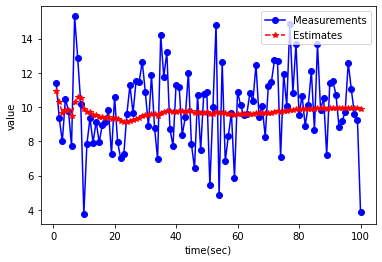

In [41]:
time = [i for i in range(1, 101)]
plt.plot(time, data, 'bo-', label='Measurements')
plt.plot(time, x_lst, 'r*--', label="Estimates")
plt.legend(loc='upper right')
plt.xlabel('time(sec)')
plt.ylabel('value')